# ***Title: Customer Churn Prediction Analysis Using Ensemble Techniques in Machine Learning***

Description: Customers are a company's most valuable asset, and maintaining customers is critical for any organisation looking to increase revenue and develop long-term meaningful relationships with customers. Furthermore, the cost of obtaining a new client is five times that of keeping an existing customer. Customer Churn/Attrition is one of the most well-known business difficulties in which consumers or subscribers discontinue doing business with a service or a firm. Ideally, they will no longer be a paying customer. A client is considered to have been churned if a certain length of time has passed since the consumer last interacted with the company. Identifying whether or not a client will churn and offering relevant information aimed at customer retention are crucial to lowering churn. Our brains cannot anticipate customer turnover for millions of clients; here is where machine learning may assist.

Dataset: https://www.kaggle.com/code/kerneler/starter-wafn-usec-telco-customer-05c825b4-5/data

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, silhouette_samples, silhouette_score,f1_score

EDA

In [ ]:
#importing the dataset
data = pd.read_csv("Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#dropping customer ID because it's not required
data.drop(columns=['customerID'],inplace=True)
#changing feature "TotalCharges" to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#Removing duplicates
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
#creating a copy
data_copy = data.copy()
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
print("Description of Categorical Data: \n")
data_copy.astype('object').describe().transpose()

Description of Categorical Data: 



,count,unique,top,freq
gender,7010,2,Male,3535
SeniorCitizen,7010,2,0,5869
Partner,7010,2,No,3617
Dependents,7010,2,No,4911
tenure,7010,72,1,591
PhoneService,7010,2,Yes,6330
MultipleLines,7010,3,No,3363
InternetService,7010,3,Fiber optic,3090
OnlineSecurity,7010,3,No,3489
OnlineBackup,7010,3,No,3079


In [ ]:
cols = [col for col in data if data[col].dtype == 'object']

for each_col in cols:
    le = LabelEncoder()
    data[each_col] = le.fit_transform(data[each_col])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
x = data.columns.values
x = np.delete(x,len(x)-1)
x_variable = data[x]
x_variable

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [ ]:
y_variable = data['Churn']
y_variable

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7010, dtype: int64

In [ ]:
#Normalization by Standard Scaler
scaler = StandardScaler()
scaler.fit(x_variable)
scaled_data_x = scaler.transform(x_variable)
scaled_data_x

array([[-1.00859615, -0.44092098,  1.03248161, ...,  0.40341767,
        -1.16552254, -0.99728422],
       [ 0.99147712, -0.44092098, -0.96854025, ...,  1.34075869,
        -0.26407097, -0.17684767],
       [ 0.99147712, -0.44092098, -0.96854025, ...,  1.34075869,
        -0.36718904, -0.96273999],
       ...,
       [-1.00859615, -0.44092098,  1.03248161, ...,  0.40341767,
        -1.17383852, -0.85760728],
       [ 0.99147712,  2.26798006,  1.03248161, ...,  1.34075869,
         0.31638402, -0.87518822],
       [ 0.99147712, -0.44092098, -0.96854025, ..., -1.47126437,
         1.35588076,  2.009189  ]])

DIMENTIONALITY REDUCTION USING PCA

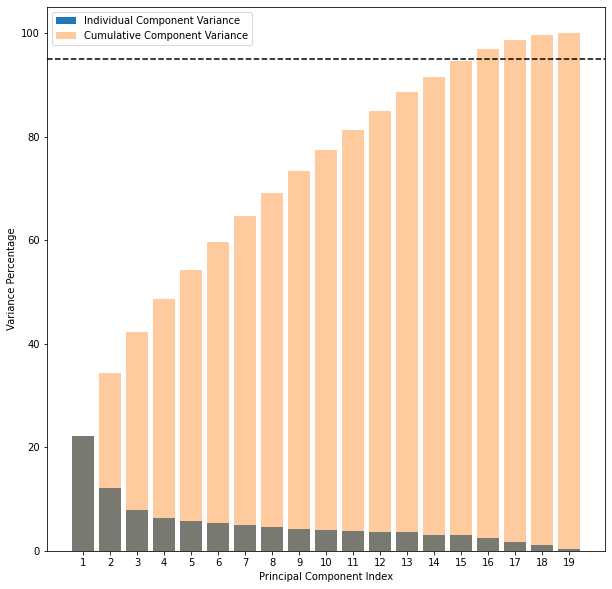

In [ ]:
#PCA
pca = PCA(n_components=None)
pca.fit(scaled_data_x)
var = pca.explained_variance_ratio_ * 100
cum_var = np.cumsum(var)
plt.figure(figsize=(10,10))
plt.bar(range(1,20), var, align="center", label="Individual Component Variance")
plt.bar(range(1,20), cum_var, align="center", label="Cumulative Component Variance",alpha=0.4)

plt.ylabel("Variance Percentage")
plt.xlabel("Principal Component Index")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.axhline(y=95,color="black",linestyle="--")
plt.legend(loc='best')
plt.show()

Therefore from the above graph we can see that 16 features covers almost 95% of variance in data. So we can fix the components as 16.

In [ ]:
pca_1 = PCA(n_components=0.95)
pca_1.fit(scaled_data_x)
pca_x = pca_1.transform(scaled_data_x)
pca_x.shape
print(pca_1.n_features_in_)

19


In [ ]:
pca_1.n_components_

16

In [ ]:
accuracy = list()
for i in range(1,20):
    pca_1 = PCA(n_components=i)
    pca_1.fit(scaled_data_x)
    pca_x = pca_1.transform(scaled_data_x)
    X_train, X_test, y_train, y_test = train_test_split(pca_x, y_variable, test_size=0.3,shuffle=True,random_state=42)
    model = LogisticRegression()
    result = model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    # Print the prediction accuracy
    accuracy.append((accuracy_score(y_test, prediction_test))*100)

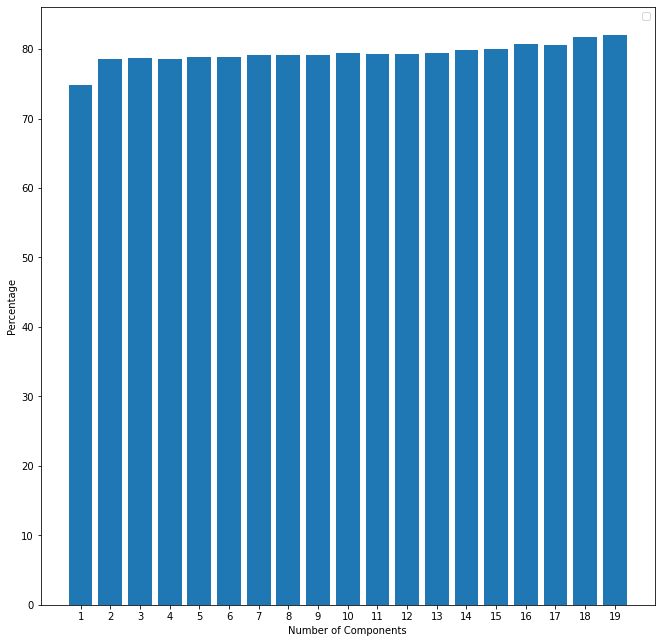

In [ ]:
plt.figure(figsize=(11,11))
plt.bar(range(1,20), accuracy, align="center")
plt.ylabel("Percentage")
plt.xlabel("Number of Components")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.legend(loc='best')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_x, y_variable, test_size=0.3,shuffle=True,random_state=42)

In [ ]:
#Balancing the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

LOGISTIC REGRESSION


In [ ]:
model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))

0.746077032810271
0.6212765957446809


SVC

In [ ]:
SVC_Model = SVC()
SVC_Model.fit(X_train, y_train)
SVC_Model_Predict = SVC_Model.predict(X_test)
print(accuracy_score(y_test,SVC_Model_Predict))
print (f1_score(y_test, SVC_Model_Predict))

0.7684260580123633
0.6156274664561958


K MEANS CLUSTERING

In [ ]:
kmeans = KMeans(n_clusters= 2) 
#predict the labels of clusters.
label = kmeans.fit_predict(pca_x)
print(silhouette_score(pca_x,label))

0.15648398454923382


In [ ]:
print(accuracy_score(label,y_variable))
print (f1_score(label,y_variable))

0.45606276747503566
0.16289791437980242


In [ ]:
#PCA
pca = PCA(2) 
#Transform the data
df = pca.fit_transform(scaled_data_x) 
df.shape

(7010, 2)

In [ ]:
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(df)
print(label)

[0 0 0 ... 0 0 1]


In [ ]:
kmeans.cluster_centers_

array([[-1.36288495, -0.06333919],
       [ 2.16251118,  0.1005013 ]])

In [ ]:
print(accuracy_score(label,y_variable))
print(silhouette_score(pca_x,label))

0.45706134094151213
0.1561193793695691


PLOTTING K MEANS CLUSTER

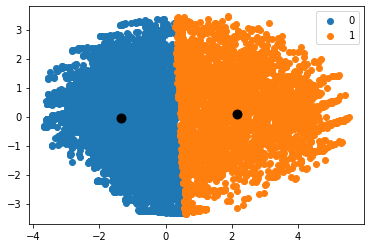

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

DECISION TREE

In [ ]:
model = DecisionTreeClassifier()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
print (accuracy_score(y_test, prediction_test))
print(f1_score(y_test, prediction_test))

0.7094626723728008
0.485256950294861


RANDOM FOREST

In [ ]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (accuracy_score(y_test, prediction_test))
print(f1_score(y_test, prediction_test))

0.7703281027104137
0.6217697729052466


NAIVE BAYES CLASSIFIER

In [ ]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction_test = model_rf.predict(X_test)
print (accuracy_score(y_test, prediction_test))
print(f1_score(y_test, prediction_test))

0.7703281027104137
0.6217697729052466


KNN

In [ ]:
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
print (accuracy_score(y_test, prediction_test))
print(f1_score(y_test, prediction_test))

0.7023300047551118
0.589238845144357


ADA BOOST 

In [ ]:
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))

0.746077032810271
0.6056129985228952


XG BOOST

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))

0.7541607227769852
0.617320503330866


After Dimentionality reduction, Naive bayes and Random forest Classifier gives the best accuracy of 0.77.

HYPER PARAMETER TUNING

LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression()

grid_vals = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1]}
grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy',cv=6) 

#Training and Prediction
grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)
print(accuracy_score(y_test,preds))

0.746077032810271


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

In [ ]:
logistic = LogisticRegression() 
model = logistic.fit(X_train, y_train)

# Predicted probability of 2 classes
y_predict_prob = model.predict_proba(X_test)

# Predicted probability of class 1
y_predict_prob_class_1 = y_predict_prob[:,1]
t=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# Classification based on Self-defined threshold
for i in t:
  y_predict_class = [1 if prob > i else 0 for prob in y_predict_prob_class_1]
  print("Accuracy:", round(accuracy_score(y_test, y_predict_class), 3),"  Threshold Value:",i)

Accuracy: 0.505   Threshold Value: 0.1
Accuracy: 0.592   Threshold Value: 0.2
Accuracy: 0.641   Threshold Value: 0.3
Accuracy: 0.689   Threshold Value: 0.4
Accuracy: 0.746   Threshold Value: 0.5
Accuracy: 0.78   Threshold Value: 0.6
Accuracy: 0.811   Threshold Value: 0.7
Accuracy: 0.808   Threshold Value: 0.8
Accuracy: 0.748   Threshold Value: 0.9


SVC

In [ ]:
C=[0.1,0.3,0.5,0.7,0.9,1.0]
gamma=[0.1,0.3,0.5,0.7,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=SVC(),cv=3,param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
0.8704407038179455
SVC(gamma=0.7)


In [ ]:
preds = gd.best_estimator_.predict(X_test)
print(accuracy_score(y_test,preds))

0.755587256300523


NAIVE BAYES

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
l=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=50)}

gs_NB = GridSearchCV(estimator=l, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')
gs_NB.fit(X_train, y_train);
print(gs_NB.best_params_)
print(gs_NB.best_score_)
# predict the target on the test dataset
predict_test = gs_NB.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Fitting 15 folds for each of 50 candidates, totalling 750 fits
{'var_smoothing': 0.014563484775012436}
0.7682257464436961
accuracy_score on test dataset :  0.7579648121730861


DECISION BOUNDARY WITH SINGLE PERCEPTRON

In [ ]:
pca = PCA(2) 
#Transform the data
x = pca.fit_transform(scaled_data_x) 
x.shape
y = y_variable
y.shape

(7010,)

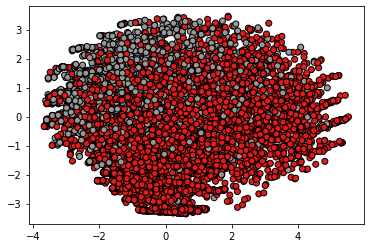

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.show()

In [ ]:
clf = Perceptron(max_iter=100).fit(x, y)
print("Classes of the model : ",clf.classes_)
print("Intercept of the decision boundary : ",clf.intercept_)
print("Coefficients of the decision boundary : ",clf.coef_)

Classes of the model :  [0 1]
Intercept of the decision boundary :  [-6.]
Coefficients of the decision boundary :  [[0.78265794 1.97873642]]


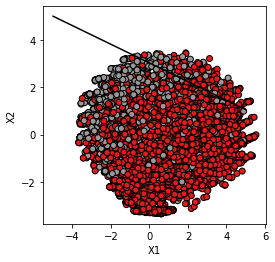

In [ ]:
ymin, ymax = -5,5
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plotting the decision boundary
plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.scatter(x[:,0], x[:,1], c = y, cmap=plt.cm.Set1,edgecolor='k')
plt.plot(xx, yy, 'k-')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()


In [ ]:
#MULTI LAYER PERCEPTRON
hidden_layer_size = [1,10,20,50,100,200,300,500]
activation = ['logistic','identity','tanh','relu']
m=0
for i in hidden_layer_size:
  for j in activation:
    clf = MLPClassifier(hidden_layer_sizes=(i,), activation=j, random_state=1)
    clf.fit(X_train, y_train)
    
    if clf.score(X_test, y_test) > m:
      h=i
      a=j
      m=clf.score(X_test, y_test)
print("Layer Size:",h,"  Activation Function:",a,"  Score:",m)    

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

ACCURACY COMPARISON

In [ ]:
X = ['Logistic Regression','KNN','Naive Bayes','Decision Tree','Random Forest','SVM','KMeans','ADA Boost','XG Boost','MLP']
before = np.array([0.778,0.760,0.792,0.763,0.792,0.802,0.659,0.819,0.839,0.817]) 
after_dr = np.array([0.778,0.769,0.837,0.761,0.833,0.802,0.660,0.782,0.790,0.809])
after_pt = np.array([0.778,0.784,0.781,0,0,0.778,0.660,0,0,0.847])

X_axis = np.arange(len(X))
plt.figure(figsize=(15,15))
plt.bar(X_axis-0.2, before*100, 0.2, label = 'Before Tuning and Dimensionality Reduction')
plt.bar(X_axis, after_dr*100, 0.2, label = 'After Dimensionality Reduction')
plt.bar(X_axis+0.2, after_pt*100, 0.2, label = 'After Parameter Tuning')

plt.xticks(X_axis, X)
plt.xlabel("Different Models")
plt.ylabel("Accuracy Percentage")
plt.title("Comparison of Accuracies for different models")
plt.legend()
plt.show()

The Siloutte Score for the KMeans Clustering algorithm is 0.1561193793695691, which is not so good or either too bad also.